# Tri fusion

Ce tri sera notre premier exemple de l'utilisation du principe *Diviser pour régner* que nous détaillerons plus tard.

Le principe du tri fusion est sûrement celui que vous utilisez pour ranger les fiches de liaison de vos classes dans l'ordre alphabétique :
- on divise le paquet en sous-paquets de taille raisonable;
- on tri chaque sous-paquet assez facilement car ces sous-paquets sont petits
- on fusionne ensuite les sous-paquets

Deux questions nous viennent alors à l'esprit :

1. **Quel est l'intérêt de ce procédé ?**
2. **Pourquoi va-t-il nous faire gagner du temps?**

**Qu'en pensez-vous ?**

Maintenant, comment mettre en marche ce tri sur machine. Voyons un exemple :

![merge](./IMG/merge.png)


L'idée est donc la suivante: si le tableau a au plus une valeur, il est trié, sinon on
coupe le tableau en deux, on trie ces deux moitiés et on fusionne.


In [1]:
def tri_fusion(xs: list) -> list:
        t = len(xs) 
        if t < 2:
            return xs
        return fusion(tri_fusion(xs[:t//2]), tri_fusion(xs[t//2:])) 

Il reste à définir la fusion:

In [2]:
def fusion(xs: list, ys: list) -> list:
        """xs et ys sont triées"""
        if xs == [] or ys == []:
            return xs + ys
        elif xs[-1] < ys[-1]: # si le plus petit de xs est plus petit que le plu spetit de ys 
            return fusion(xs[:-1], ys) + [xs[-1]] # je mets donc ce plus petit à droite
        else:
            return fusion(xs, ys[:-1]) + [ys[-1]] # sinon le plus petit est celui de ys 

fusion([5, 3, 1], [6, 4, 2])

[6, 5, 4, 3, 2, 1]

Ou on aurait pu mettre les plus grands devant

In [3]:
def fusion(xs: list, ys: list) -> list:
        if xs == [] or ys == []:
            return xs + ys
        elif xs[0] > ys[0]: # si le plus grand de xs est plus grand que le plus grand de ys 
            return [xs[0]] + fusion(xs[1:],ys) # je mets donc ce plus grand à gauche
        else:
            return [ys[0]] + fusion(xs,ys[1:]) # sinon le plus grand est celui de ys 

fusion([5, 3, 1], [6, 4, 2])

[6, 5, 4, 3, 2, 1]

Selon l'implémentation des listes, on prendra ce qui a le moindre coût : mettre devant ou mettre derrière une liste, avoir accès au premier ou au dernier élément. Avec le type générique liste, on n'a accès qu'à tête et queue donc on privilégira la 2e version.

Une fois cette tâche accomplie, vous pouvez essayer d'observer expérimentalement la complexité :

In [4]:
from numpy.random import permutation

In [5]:
for k in range(1,10):
    %timeit tri_fusion(list(permutation(2**k)))

10.4 µs ± 933 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
16.7 µs ± 2.08 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
25.8 µs ± 3.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
51.2 µs ± 4.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
108 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
248 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
582 µs ± 36.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.51 ms ± 197 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.64 ms ± 208 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Qu'en pensez-vous ?**

### Un peu de maths :) / :(

Nous avons besoin d'un peu de maths ici pour explorer plus ou moins rigoureusement la complexité temporelle.
Appelons $F(n)$ le nombre d'opérations élémentaires nécessaires pour trier une liste de taille *n*. Nous avons $$F(n) = F(n/2) + F(n/2) + \text{ coût de la fusion des deux demi-listes de taille } n/2$$

Or il faut regarder chaque élément de chaque demi-liste et faire des comparaisons et un ajout en bout de liste. On peut considérer ces opérations à coût constant. Le coût de la fusion est donc de l'ordre de la somme des tailles des sous-listes donc ici $n/2 + n/2=n$.

On doit donc étudier une suite $$F(n) = 2\times F(n/2) + n$$. Pas évident... Simplifions-nous la vie pour l'instant en considérant que *n* est une puissance de 2 : $n=2^k$. On a alors $$F(2^k) = 2F(2^{k-1}) + 2^k$$
La ruse est alors de tout diviser par $2^k$ pour avoir une progression arithmétique. Si on note $u_k=\frac{F(2^k)}{2^k}$ on obtient en effet:
$$u_k=u_{k-1}+1$$ En posant $F(0)=0$ alors $u_0=0$ et $u_k=k=\frac{F(2^k)}{2^k}$. Or $n=2^k$ i.e. $k=\log_2(n)$ et finalement $$F(n)=n\cdot\log_2(n)$$
Il ne reste plus qu'à encadrer un entier naturel *n* quelconque entre deux puissances successives de 2 pour obtenir que la complexité du tri fusion est en $\Theta(n\log(n))$.

Facile.



## Comparaisons de tris et tracés de graphiques


Tracez sur un même graphique les temps d'exécution des tris étudiés en
fonction de la longueur d'une liste mélangée.

Sur un autre graphique, comparez ces tris avec des listes ordonnées dans
le sens croissant, puis avec des listes ordonnées dans le sens
décroissant.

Pour cela, voici quelques rappels sur Matplotlib.


Text(0, 0.5, "C'est de l'amour")

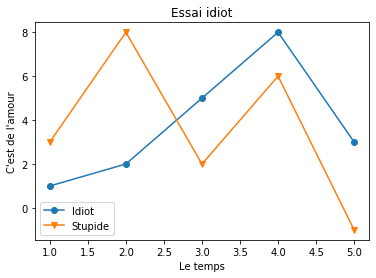

In [6]:
import matplotlib.pyplot as plt
p1 = plt.plot([1,2,3,4,5],[1,2,5,8,3], marker = 'o',label = "Idiot")
p2 = plt.plot([1,2,3,4,5],[3,8,2,6,-1], marker = 'v',label = "Stupide")
plt.legend()
plt.title("Essai idiot")
plt.xlabel("Le temps")
plt.ylabel("C'est de l'amour")

Comment mesurer le temps? On utilise la fonction perf_counter de la bibliothèque time:

In [7]:
from time import perf_counter

def temps(tri, p):
    debut = perf_counter()
    tri(p)
    return perf_counter() - debut

In [8]:
from sys import setrecursionlimit
setrecursionlimit(1000000)

tailles = [2**k for k in range(10,15)]
perm = [list(permutation(2**k)) for k in range(10,15)]

Text(0, 0.5, 'Temps en s')

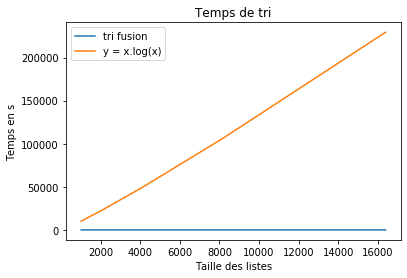

In [9]:
import math


plt.plot(tailles,[temps(tri_fusion,p) for p in perm],label = "tri fusion")
plt.plot(tailles,[t*math.log(t,2) for t in tailles],label = "y = x.log(x)")

plt.legend()
plt.title('Temps de tri')
plt.xlabel('Taille des listes')
plt.ylabel('Temps en s')

Pas terrible. Il faudrait trouver la constante:

Text(0, 0.5, 'Rapport')

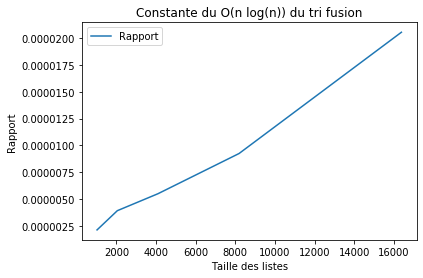

In [10]:
plt.plot(tailles,[temps(tri_fusion,p)/(len(p)*math.log(len(p), 2)) for p in perm],label = "Rapport")

plt.legend()
plt.title('Constante du O(n log(n)) du tri fusion')
plt.xlabel('Taille des listes')
plt.ylabel('Rapport')

un peu variable. Disons $`1,5.10^{-5}`$

Text(0, 0.5, 'Temps en s')

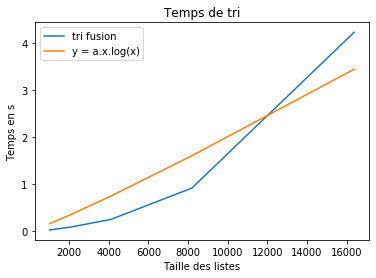

In [11]:

plt.plot(tailles,[temps(tri_fusion,p) for p in perm],label = "tri fusion")
plt.plot(tailles,[t*math.log(t,2)*1.5*1e-5 for t in tailles],label = "y = a.x.log(x)")

plt.legend()
plt.title('Temps de tri')
plt.xlabel('Taille des listes')
plt.ylabel('Temps en s')

**Comparer ensuite avec les tris que vous avez vus dans les modules précédents**
Vous pourrez essayer d'écrire les tris en itératif compte-tenu du mauvais traitement des fonctions récursives par Python.

## Parlons (un peu) de la mémoire



Lorsque nous fusionnons les listes, on crée plein de petites listes intermédiaires (cf [pythontutor](http://pythontutor.com/visualize.html#code=def%20fusion%28xs%3A%20list,%20ys%3A%20list%29%20-%3E%20list%3A%0A%20%20%20%20%20%20%20%20if%20xs%20%3D%3D%20%5B%5D%20or%20ys%20%3D%3D%20%5B%5D%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20xs%20%2B%20ys%0A%20%20%20%20%20%20%20%20elif%20xs%5B0%5D%20%3C%20ys%5B0%5D%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20fusion%28xs%5B1%3A%5D,ys%29%20%2B%20%5Bxs%5B0%5D%5D%0A%20%20%20%20%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20fusion%28xs,ys%5B1%3A%5D%29%20%2B%20%5Bys%5B0%5D%5D%0A%0Afusion%28%5B1,3,5%5D,%20%5B2,4,6%5D%29&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false))

On peut essayer de remédier à ce problème en utilisant un *buffer* (tampon).
On voudrait disposer d'un tampon dans lequel on va fusionner petit à petit les éléments du tableau à trier :

In [12]:
def fusion_en_place(xs, tampon, lo, hi):
    mid = (lo + hi) // 2
    i, j = lo, mid # le tableau gauche s'arrête au milieu et celui de droite commence au milieu
    for pos in range(lo, hi):
        if j >= hi: # on a rangé toute la partie droite
            tampon[pos] = xs[i] # on met le prochain élément de la partie gauche restante
            i += 1 # on avance dans la partie gauche d'un cran
        elif i >= mid: # on a rangé toute la partie gauche
            tampon[pos] = xs[j] # on met met le prochain élément de la partie droite restante
            j += 1  # on avance dans la partie droite d'un cran
        elif xs[i] <= xs[j]: # il en reste des 2 côtés : qui est le plus petit ?
            tampon[pos] = xs[i] # on place le plus petit
            i += 1 # on avance dans la partie gauche d'un cran
        else: 
            tampon[pos] = xs[j]
            j += 1 # on a placé xs[j] donc on avance à droite
    for pos in range(lo, hi):
        xs[pos] = tampon[pos] # xs trié entre les indices lo et hi

def tri_fusion_en_place(xs):
    def aux(tampon, lo, hi):
        if hi - lo >= 2:
            mid = (lo + hi) // 2
            aux(tampon, lo, mid)
            aux(tampon, mid, hi)
            fusion_en_place(xs, tampon, lo, hi)
    aux([0]*len(xs), 0, len(xs))

xs = [1, 5, 2, 4, 9, 3, 2, 5, 47, 56, 12, 23, 65, 54]
print(xs)
tri_fusion_en_place(xs)
print(xs)

[1, 5, 2, 4, 9, 3, 2, 5, 47, 56, 12, 23, 65, 54]
[1, 2, 2, 3, 4, 5, 5, 9, 12, 23, 47, 54, 56, 65]


In [1]:
import os
os.sys.getrecursionlimit()

3000

In [13]:
import os

os.sys.setrecursionlimit(100000)
%timeit tri_fusion(list(range(10000)))
%timeit tri_fusion_en_place(list(range(10000)))
%timeit tri_fusion_en_place(list(range(20000)))
%timeit tri_fusion_en_place(list(range(40000)))
%timeit tri_fusion_en_place(list(range(80000)))

471 ms ± 29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
43.1 ms ± 1.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
94 ms ± 5.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
201 ms ± 14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
405 ms ± 7.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


C'est 10 fois mieux en temps et largement mieux  en mémoire  ! Maintenant comparer les codes des fonctions de fusion dans les deux cas. Lequel comprenez-vous le plus rapidement ?...

Cherchons la constante entre le temps et n.log(n)

Text(0, 0.5, 'Rapport')

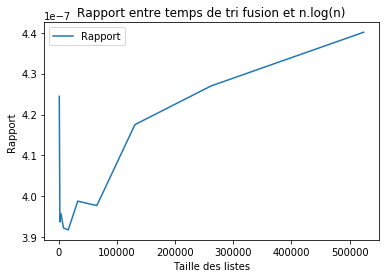

In [17]:
import math
from numpy.random import permutation
import matplotlib.pyplot as plt
tailles = [2**k for k in range(10,20)]
perm = [list(permutation(2**k)) for k in range(10,20)]

plt.plot(tailles,[temps(tri_fusion_en_place,p)/(len(p)*math.log(len(p), 2)) for p in perm],label = "Rapport")

plt.legend()
plt.title('Rapport entre temps de tri fusion et n.log(n)')
plt.xlabel('Taille des listes')
plt.ylabel('Rapport')

La constante semble être `4.3*1e-7`

Text(0, 0.5, 'Temps en s')

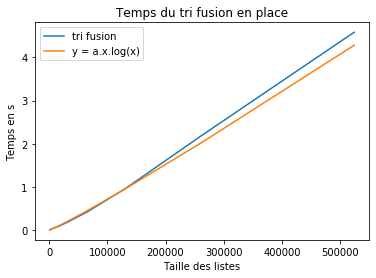

In [18]:
import math
from numpy.random import permutation
import matplotlib.pyplot as plt
tailles = [2**k for k in range(10,20)]
perm = [list(permutation(2**k)) for k in range(10,20)]

plt.plot(tailles,[temps(tri_fusion_en_place,p) for p in perm],label = "tri fusion")
plt.plot(tailles,[t*math.log(t,2)*4.3*1e-7 for t in tailles],label = "y = a.x.log(x)")

plt.legend()
plt.title('Temps du tri fusion en place')
plt.xlabel('Taille des listes')
plt.ylabel('Temps en s')

Dans d'autres langages, ce n'est pas un problème. Par exemple Haskell :

```haskell
fusion [] ys = ys
fusion xs [] = xs
fusion (x:xs) (y:ys) 
        | x < y = x:(fusion xs (y:ys))
        | otherwise = y:(fusion (x:xs) ys)
```
On parlera de programmation fonctionnelle et de son rôle en 2020 au bloc 5.

Le seul remède en Python malheureusement est souvent de penser itératif.

# Les tris en Python

Python a deux fonctions permettant de trier des collections : `sorted` et `sort`. La première effectue un tri sur un `iterable` et crée une *nouvelle* liste sans modifier l'itérable donné en argument.  
`sort` au contraire est une *méthode* de la classe `list` et effectue un tri *en place* de la liste de départ : celle-ci est donc modifiée par une suite d'opérations à effet de bord. Dans les premières versions de Python, ces fonctions étaient dérivées du tri rapide mais finalement l'algorithme utilisé actuellement est dérivé du tri fusion (il s'appelle [`timsort`](https://fr.wikipedia.org/wiki/Timsort) du nom de son auteur). 
Il est ainsi important de noter que l'idée du tri fusion de John Von Neumann est toujours utilisée. Son introduction dans les années 50 a marqué l'émergence de l'analyse des algorithmes dont plus tard Don Knuth sera le héraut. C'est aussi l'exemple phare du principe de *diviser pour régner* qui sera l'objet du prochain chapitre...


### Tri républicain/démocratique

Le Sénat américain est composé de deux sénateurs par état (il y a 50
états...). Vous allez récupérer les statistiques sur 46 votes du
[109e congrès](./SCRIPTS/vote_senateurs.txt) (2006). Un 1 signifie un Yea, un $`-1`$ un Nay et un 0 une
abstention. Il manque les votes de Jon CORZINE, sénateur
du New-Jersey qui a été victime d'un accident de voiture cette année-là
(cela fait une exception à gérer :-/ ).

On utilisera les fonctions `open, read, split` pour récupérer les données.

1.  Créez un dictionnaire `vs` de type `{Nom : liste des votes}` et un autre, `os`, de type `{Nom : [Parti, État]}`.

    Par exemple:

        In [18]: os['Obama']
        Out[18]: ['D', 'IL']

        In [20]: vs['Obama']
        Out[20]: [1, -1, 1, 1, 1, -1, -1,...]

    On pourra utiliser la fonction `int`et des définitions par compréhension.

2.  Comment utiliser le produit scalaire pour mesurer l'accord ou le
    désaccord entre deux sénateurs?

3.  Écrivez une fonction `compare(sen1, sen2)` qui mesure le degré d'accord de deux sénateurs.
    Par exemple:

        In [21]: compare('Obama', 'McCain')
        Out[21]: 16

4.  Écrivez une fonction `senat_parti(parti)` qui renvoie l'ensemble des noms des sénateurs
    d'un parti donné. Créez aussi une fonction qui renvoie le nom des
    sénateurs par état, le nom des états par parti.

5.  Écrivez une fonction `compare_sen_etat(etat)` qui mesure la cohérence des votes des deux
    sénateurs d'un état donné.

        In [23]: compareEtat('WA')
        Out[23]: (39, 'WA', ('Cantwell', 'Murray'))  

    Classez les états dans l'ordre croissant des cohérences.

6.  Créez une fonction `plus_eloigne(sen, ens)` qui renvoie le nom et la mesure de l'écart du
    sénateur d'un ensemble donné le plus en désaccord avec un sénateur
    donné.

        In [33]: plusEloigne('Obama',senatParti('D'))
        Out[33]: (22, 'Nelson2')

        In [34]: plusEloigne('Obama',senatParti('R'))
        Out[34]: (7, 'Sununu')

    Faites de même avec le plus en accord.

7.  Quel est le parti le plus cohérent? Comment le déterminer à l'aide
    d'une fonction calculant une moyenne de cohérence.

    Par souci d'efficacité, on pourra se souvenir que le produit
    scalaire est distributif sur l'addition des vecteurs.

8.  Écrivez une fonction `moinsDaccord(ens)` qui renvoie le couple de sénateurs les moins
    d'accord d'un ensemble donné:

        In [50]: moinsDaccord(senateurs)
        Out[50]: (('Feingold', 'Inhofe'), -3)  

    Combien de calculs et de comparaisons sont effectués? Pensez-vous
    pouvoir être plus efficace?

9.  Qui est le sénateur le plus Républicain? L'État le plus Démocrate?
    Classez les sénateurs/États selon ces critères.

10. Ouvrez le fichier [`ONU_vote.txt`](./SCRIPTS/ONU_vote.txt) et étudiez-le d'une manière similaire à ce qui
    vient d'être fait.


# De belles images

Voici deux illustrations du tri fusion : à vous de créer les codes associés :) Quelle version du tri fusion choisir ?


<figure class="video_container">
  <video controls="true" allowfullscreen="true" autoplay="true">
    <source src="merge.mp4" type="video/mp4">
  </video>
</figure>

[illustration du tri fusion...à coder](https://i.imgur.com/MAusQ25.mp4)


[et bien d'autres tris](https://imgur.com/gallery/voutF)